# Heart Patient Dataset

In [476]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import numpy as np

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from patsy import dmatrices, dmatrix

In [147]:
from sklearn.preprocessing import StandardScaler

In [169]:
from sklearn.model_selection import train_test_split

In [175]:
from sklearn.feature_selection import SequentialFeatureSelector

In [241]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [2]:
import os
import logging

In [3]:
import math

## 1. Load data 

In [4]:
def init_logger():
    # create logger
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.INFO)

    # create formatter
    formatter = logging.Formatter('%(levelname)s - %(message)s')

    # add formatter to ch
    ch.setFormatter(formatter)

    # add ch to logger
    logger.addHandler(ch)
    return logger

In [5]:
logger = init_logger()

In [6]:
base=os.environ['HOME']

In [7]:
location='Documents/Github/quant_exercises/pfizer/Data'

In [8]:
fname='heart_data.csv'

In [9]:
def read_data(location,filename):
    """read the data"""
    df = pd.read_csv(os.path.join(location,filename),
                     delimiter=',',
                     dtype = { 
                         'age': np.float64,
                         'sex' : np.int64,
                         'cp': np.int64,
                         'tresbps':np.float64,
                         'chol': np.float64,
                         'fps':np.int64,
                         'restecg':np.int64,
                         'thalach':np.float64,
                         'exang': np.int64,
                         'oldpeak':np.float64,
                         'slope':np.int64,
                         'ca':np.int64,
                         'thal':np.int64,
                         'target':np.int64
                     }
                    )
    logger.info('read %s',os.path.join(filename))
    return df

In [10]:
df=read_data(os.path.join(base,location),fname)

INFO - read heart_data.csv


In [11]:
df.dtypes

age         float64
sex           int64
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 2. EDA Analysis 

In [13]:
np.round(df.corr(),3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
trestbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exang,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


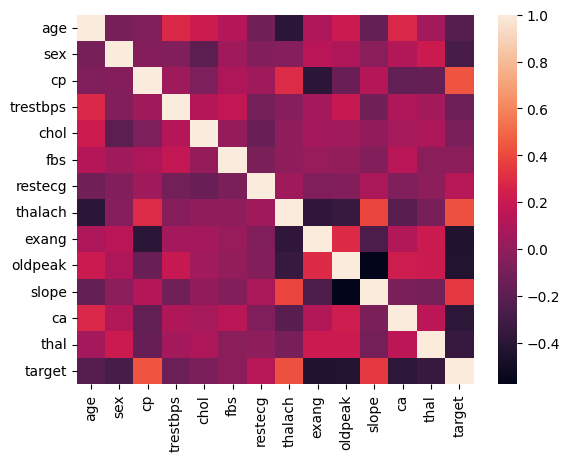

In [14]:
#plotting the heatmap for correlation
ax = sns.heatmap(np.round(df.corr(),3), annot=False)

### 2.1 Category Counts

In [107]:
def category_counts(cat_var):
    print(f"{cat_var} counts")
    print(df[cat_var].value_counts(),np.round(df[cat_var].value_counts(normalize=True),3))

In [93]:
print(df['sex'].unique())

[1 0]


In [108]:
category_counts('sex')

sex counts
sex
1    207
0     96
Name: count, dtype: int64 sex
1    0.683
0    0.317
Name: proportion, dtype: float64


In [109]:
category_counts('fbs')

fbs counts
fbs
0    258
1     45
Name: count, dtype: int64 fbs
0    0.851
1    0.149
Name: proportion, dtype: float64


In [110]:
category_counts('cp')

cp counts
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64 cp
0    0.472
2    0.287
1    0.165
3    0.076
Name: proportion, dtype: float64


In [111]:
category_counts('restecg')

restecg counts
restecg
1    152
0    147
2      4
Name: count, dtype: int64 restecg
1    0.502
0    0.485
2    0.013
Name: proportion, dtype: float64


In [112]:
category_counts('exang')

exang counts
exang
0    204
1     99
Name: count, dtype: int64 exang
0    0.673
1    0.327
Name: proportion, dtype: float64


In [113]:
category_counts('slope')

slope counts
slope
2    142
1    140
0     21
Name: count, dtype: int64 slope
2    0.469
1    0.462
0    0.069
Name: proportion, dtype: float64


In [114]:
category_counts('ca')

ca counts
ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64 ca
0    0.578
1    0.215
2    0.125
3    0.066
4    0.017
Name: proportion, dtype: float64


In [115]:
category_counts('thal')

thal counts
thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64 thal
2    0.548
3    0.386
1    0.059
0    0.007
Name: proportion, dtype: float64


### 2.2 Plots

/Users/tmuhammad/venv/heckman/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


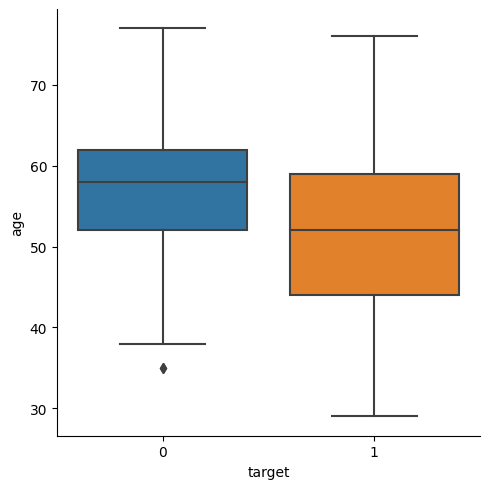

In [16]:
sns.catplot(data=df,x="target", y="age", kind="box")

/Users/tmuhammad/venv/heckman/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


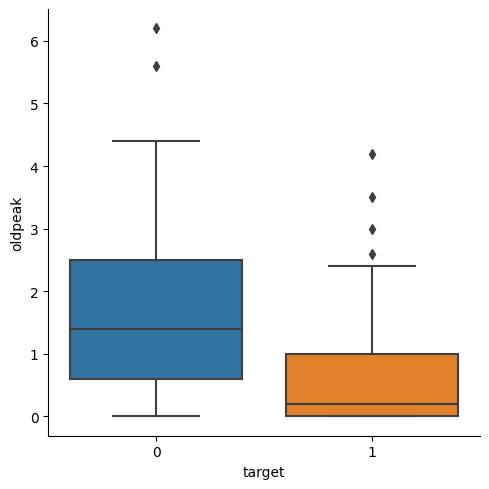

In [20]:
sns.catplot(data=df,x="target", y="oldpeak", kind="box")

/Users/tmuhammad/venv/heckman/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


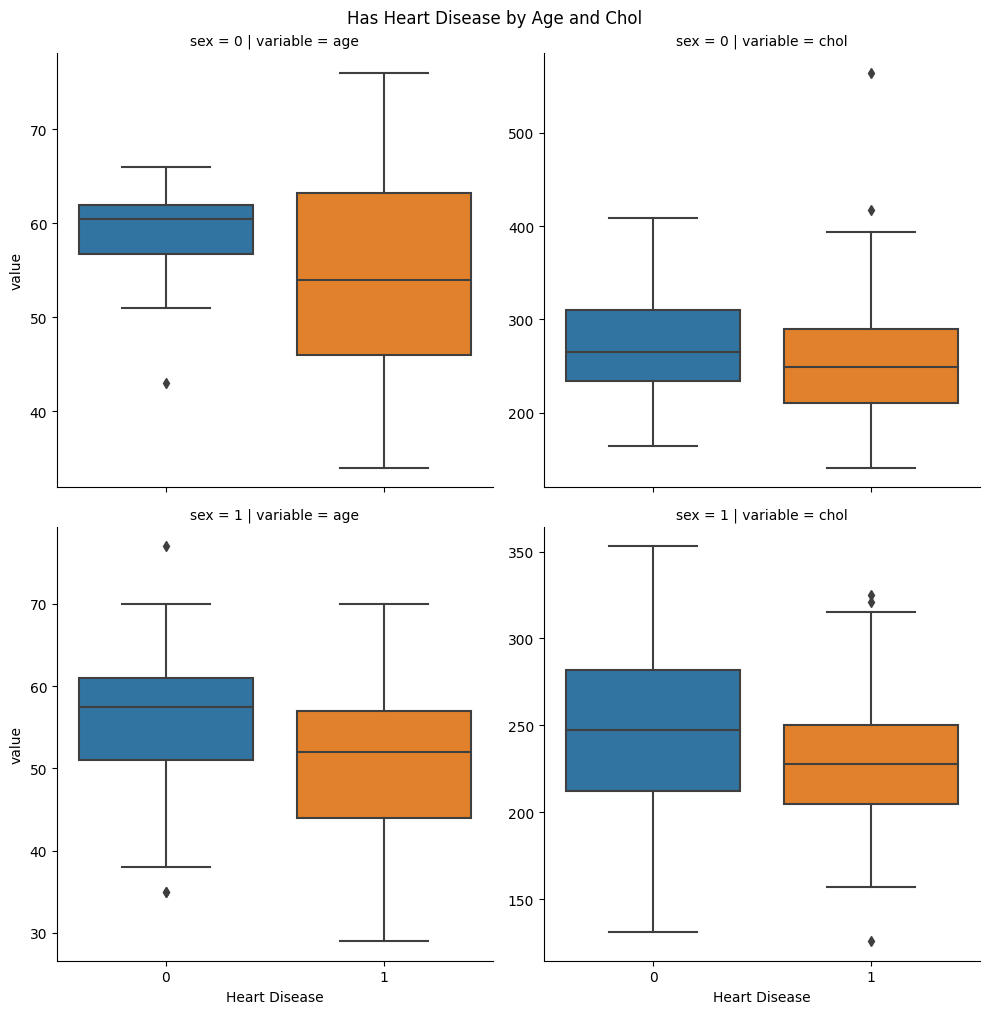

In [17]:
g=sns.catplot(
    data=pd.melt(df, id_vars=['target','sex'], value_vars=['age','chol']), x='target', y='value',
    col='variable',row='sex', kind='box', sharey=False
)
g.set_xlabels("Heart Disease")
plt.suptitle("Has Heart Disease by Age and Chol", y=1.01)
plt.show()

/Users/tmuhammad/venv/heckman/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


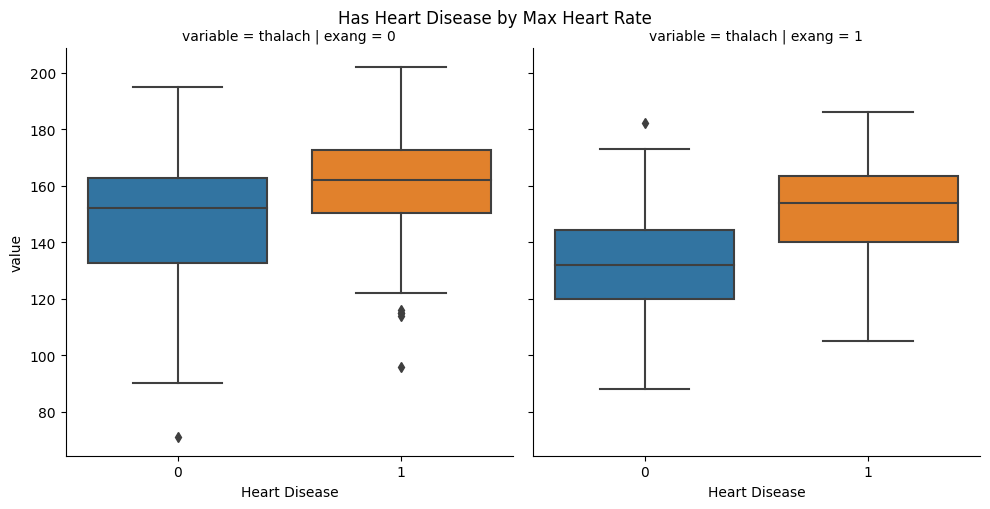

In [18]:
g=sns.catplot(
    data=pd.melt(df, id_vars=['target','exang'], value_vars=['thalach']), x='target', y='value',
    col='exang',row='variable', kind='box', sharey=True
)
g.set_xlabels("Heart Disease")
plt.suptitle("Has Heart Disease by Max Heart Rate", y=1.01)
plt.show()

/Users/tmuhammad/venv/heckman/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


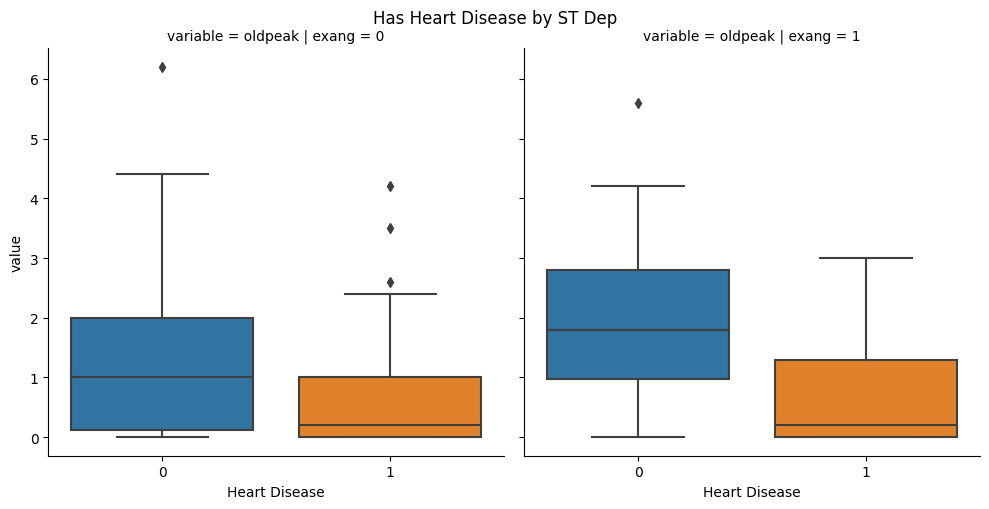

In [166]:
g=sns.catplot(
    data=pd.melt(df, id_vars=['target','exang'], value_vars=['oldpeak']), x='target', y='value',
    col='exang',row='variable', kind='box', sharey=True
)
g.set_xlabels("Heart Disease")
plt.suptitle("Has Heart Disease by ST Dep", y=1.01)
plt.show()

/Users/tmuhammad/venv/heckman/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


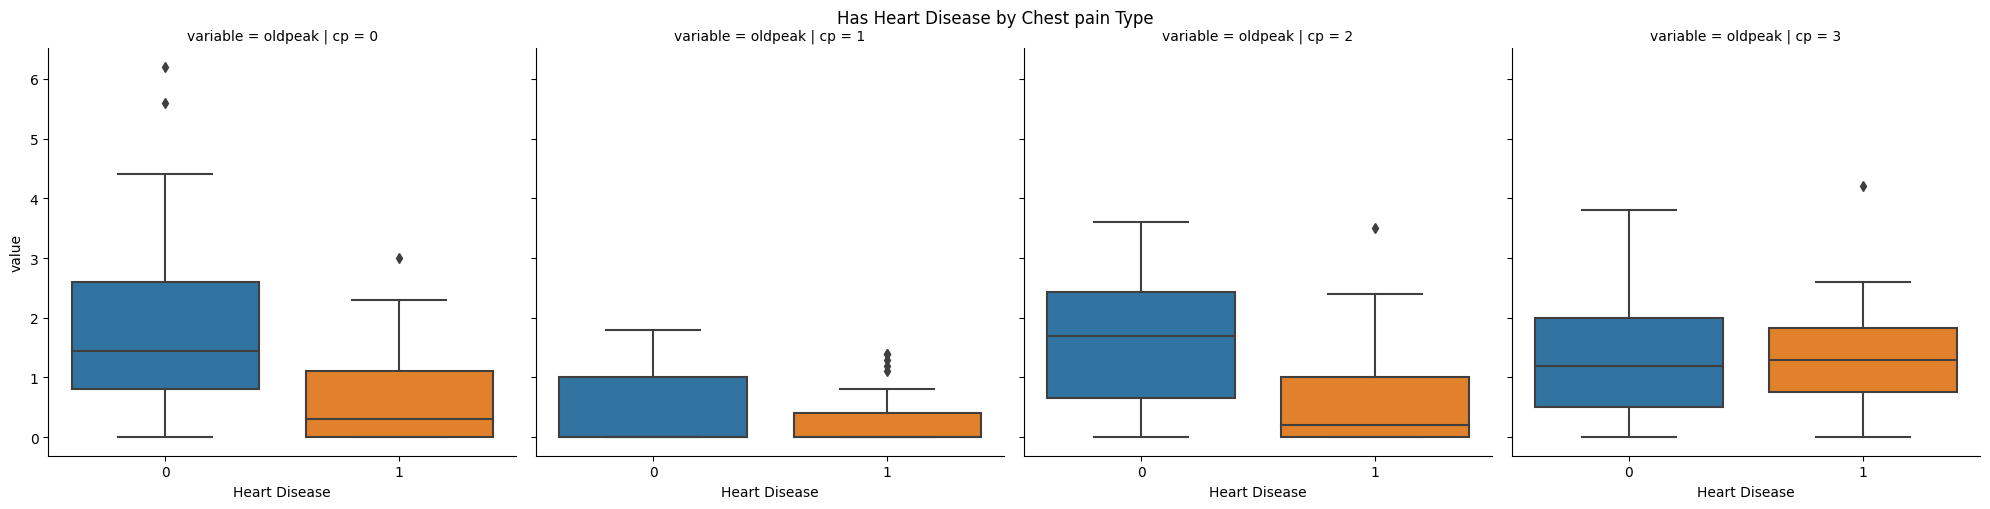

In [19]:
g=sns.catplot(
    data=pd.melt(df, id_vars=['target','cp'], value_vars=['oldpeak']), x='target', y='value',
    col='cp',row='variable', kind='box', sharey=True
)
g.set_xlabels("Heart Disease")
plt.suptitle("Has Heart Disease by Chest pain Type", y=1.01)
plt.show()

In [118]:
def plot_variables_against_categorical(df, categorical_var, excl_vars, num_cols=3):
    # Get the list of all non-categorical columns (numeric variables)
    numeric_vars = [var for var in df.columns if var not in excl_vars]

    # Calculate the number of rows needed for the subplots
    num_rows = (len(numeric_vars) + num_cols - 1) // num_cols

    # Create the catplot with a box plot
    g = sns.catplot(x=categorical_var, y="value", col="variable", kind="box", 
                    data=pd.melt(df, id_vars=categorical_var, value_vars=numeric_vars),
                    col_wrap=num_cols, height=5, aspect=1, sharey=False)

    # Set titles for each subplot
    for i, var in enumerate(numeric_vars):
        g.axes.flat[i].set_title(f'{var} vs. {categorical_var}',fontsize=12)

    # Adjust plot appearance
    g.fig.suptitle(f'{categorical_var} vs. Numeric Variables', fontsize=16,y=1.02)
    g.set_xlabels(categorical_var)
    g.set_ylabels("Value")

    plt.tight_layout()
    plt.show()

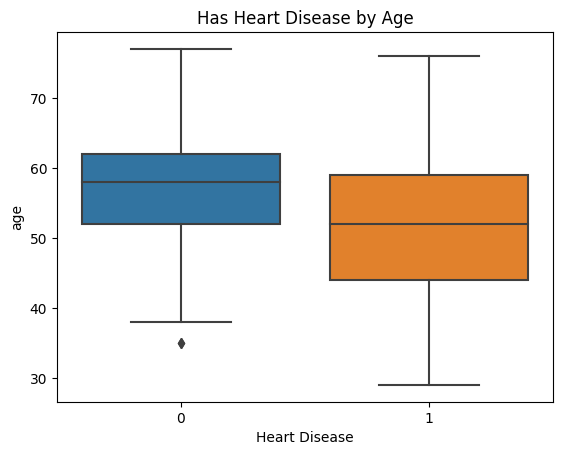

In [137]:
sns.boxplot(data=df, x="target", y="age", )
plt.xlabel("Heart Disease")
plt.title("Has Heart Disease by Age")
plt.show()

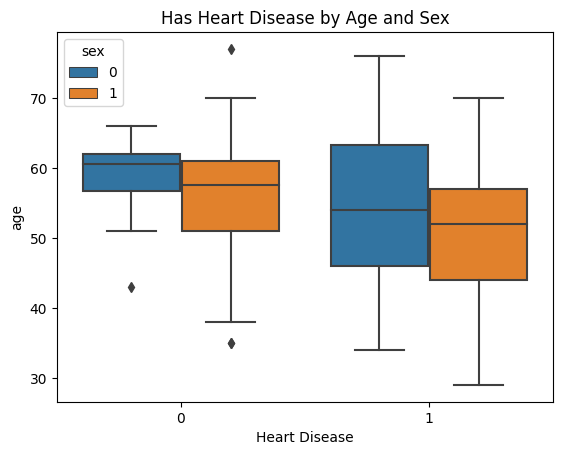

In [136]:
sns.boxplot(data=df, x="target", y="age", hue="sex")
plt.xlabel("Heart Disease")
plt.title("Has Heart Disease by Age and Sex")
plt.show()

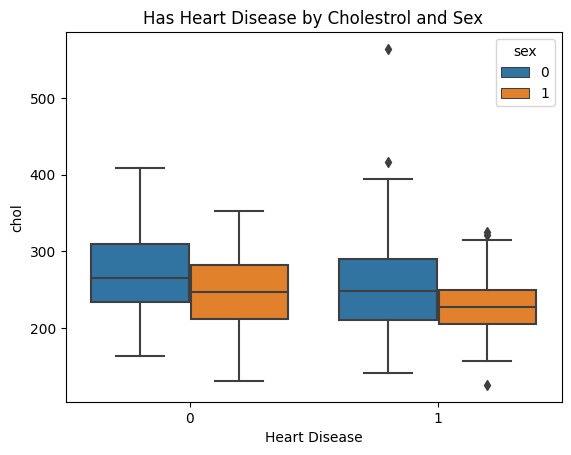

In [138]:
sns.boxplot(data=df, x="target", y="chol", hue="sex")
plt.xlabel("Heart Disease")
plt.title("Has Heart Disease by Cholestrol and Sex")
plt.show()

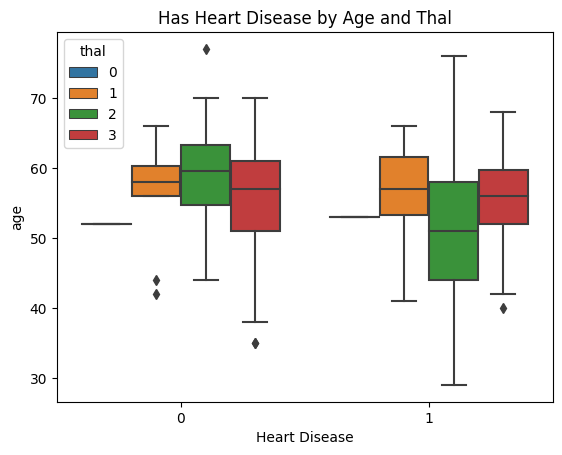

In [139]:
sns.boxplot(data=df, x="target", y="age", hue="thal")
plt.xlabel("Heart Disease")
plt.title("Has Heart Disease by Age and Thal")
plt.show()

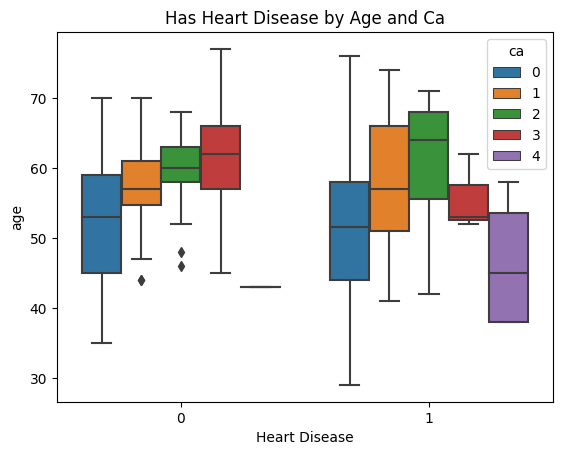

In [140]:
sns.boxplot(data=df, x="target", y="age", hue="ca")
plt.xlabel("Heart Disease")
plt.title("Has Heart Disease by Age and Ca")
plt.show()

## 3. Data Transformations

In [33]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [148]:
numeric_cols = ['age','trestbps','chol','thalach','oldpeak']

In [149]:
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [158]:
df_scaled=pd.DataFrame(scaler.transform(df[numeric_cols]),columns=numeric_cols,index=df.index)

In [159]:
df_scaled.head()

,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [168]:
df[numeric_cols].head()

,age,trestbps,chol,thalach,oldpeak
0,63.0,145,233.0,150.0,2.3
1,37.0,130,250.0,187.0,3.5
2,41.0,130,204.0,172.0,1.4
3,56.0,120,236.0,178.0,0.8
4,57.0,120,354.0,163.0,0.6


In [118]:
logger.info('Add dummy transformations')
df_dummy=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'],
               prefix=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

INFO - Add dummy transformations


In [120]:
df_dummy.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [479]:
df_dummy.groupby(by='ca_0').count()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
ca_0,,,,,,,,,,,,,,,,,,,,,
False,128,128,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128
True,175,175,175,175,175,175,175,175,175,175,...,175,175,175,175,175,175,175,175,175,175


In [478]:
df_dummy.groupby(by='ca_0')['target'].mean()

ca_0
False    0.273438
True     0.742857
Name: target, dtype: float64

In [162]:
logger.info('Add scaled variables to the data')
df_scaled=pd.merge(df_dummy.drop(columns=numeric_cols,inplace=False),df_scaled,left_index=True,right_index=True)

INFO - Add scaled variables to the data


In [163]:
variable_def='target ~ age + trestbps+chol+thalach+oldpeak \
              +sex_1 + cp_0 + cp_1 + cp_2 + fbs_1+ restecg_0+restecg_2 + exang_1 + slope_0 + slope_1 + ca_0 + ca_1 + ca_2 + ca_4 \
              +thal_0 + thal_1 + thal_2 \
              +cp_0:age+cp_0:trestbps+cp_0:chol+cp_0:thalach+cp_0:oldpeak \
              +sex_1:age+sex_1:trestbps+sex_1:chol+sex_1:thalach+sex_1:oldpeak \
              +cp_1:age+cp_1:trestbps+cp_1:chol+cp_1:thalach+cp_1:oldpeak \
              +cp_2:age+cp_2:trestbps+cp_2:chol+cp_2:thalach+cp_2:oldpeak \
              +fbs_1:age+fbs_1:trestbps+fbs_1:chol+fbs_1:thalach+fbs_1:oldpeak \
              +restecg_0:age+restecg_0:trestbps+restecg_0:chol+restecg_0:thalach+restecg_0:oldpeak \
              +restecg_2:age+restecg_2:trestbps+restecg_2:chol+restecg_2:thalach+restecg_2:oldpeak \
              +exang_1:age+exang_1:trestbps+exang_1:chol+exang_1:thalach+exang_1:oldpeak \
              +slope_0:age+slope_0:trestbps+slope_0:chol+slope_0:thalach+slope_0:oldpeak \
              +slope_1:age+slope_1:trestbps+slope_1:chol+slope_1:thalach+slope_1:oldpeak \
              +ca_0:age+ca_0:trestbps+ca_0:chol+ca_0:thalach+ca_0:oldpeak \
              +ca_1:age+ca_1:trestbps+ca_1:chol+ca_1:thalach+ca_1:oldpeak \
              +ca_2:age+ca_2:trestbps+ca_2:chol+ca_2:thalach+ca_2:oldpeak \
              +ca_4:age+ca_4:trestbps+ca_4:chol+ca_4:thalach+ca_4:oldpeak \
              +thal_0:age+thal_0:trestbps+thal_0:chol+thal_0:thalach+thal_0:oldpeak \
              +thal_1:age+thal_1:trestbps+thal_1:chol+thal_1:thalach+thal_1:oldpeak \
              +thal_2:age+thal_2:trestbps+thal_2:chol+thal_2:thalach+thal_2:oldpeak'

In [165]:
logger.info('Create interaction terms for logistic regression - unscaled')
# dropping base categories sex_0, cp_3, fbs_0, restecg_1, ca_3, thal_3
y,X=dmatrices(variable_def, df_dummy)

INFO - Create interaction terms for logistic regression - unscaled


In [166]:
logger.info('Create interaction terms for logistic regression - scaled')
# dropping base categories sex_0, cp_3, fbs_0, restecg_1, ca_3, thal_3
y_scale,X_scale=dmatrices(variable_def, df_scaled)

INFO - Create interaction terms for logistic regression - scaled


In [132]:
Xd=dmatrix('age + trestbps+chol+thalach+oldpeak \
              +sex_1 + cp_0 + cp_1 + cp_2 + fbs_1+ restecg_0+restecg_2 + exang_1 + slope_0 + slope_1 + ca_0 + ca_1 + ca_2 + ca_4 \
              +thal_0 + thal_1 + thal_2', df_dummy)

## 4. Model Estimation

In [170]:
logger.info("create training and test splits")
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, random_state=42,test_size=0.2)

INFO - create training and test splits


In [174]:
X_train.shape,y_train.shape

((242, 108), (242, 1))

### 4.1 Model Estimation

In [383]:
clf = lm.LogisticRegression(penalty='l2', fit_intercept=True)

In [384]:
model_nums=[x for x in range(0,10)]
num_features=[x+2 for x in model_nums]

In [195]:
sfs_forward = SequentialFeatureSelector(clf, 
                                        n_features_to_select=2, direction="forward").fit(X_scale[:,1:],
                                                                                         y_scale.reshape(y_scale.shape[0]))

In [385]:
sfs_forward_output={}
for i in model_nums:
   logger.info('forward selection for model %s',i)
   sfs_forward_output[i] = SequentialFeatureSelector(clf, 
                                        n_features_to_select=num_features[i], direction="forward").fit(X_train[:,1:],
                                                                                         y_train.reshape(y_train.shape[0]))
logger.info('completed forward selection for all models')

INFO - forward selection for model 0
INFO - forward selection for model 1
INFO - forward selection for model 2
INFO - forward selection for model 3
INFO - forward selection for model 4
INFO - forward selection for model 5
INFO - forward selection for model 6
INFO - forward selection for model 7
INFO - forward selection for model 8
INFO - forward selection for model 9
INFO - completed forward selection for all models


In [204]:
scaled_names=X_scale.design_info.column_names[1:]

In [386]:
selected_vars_output={}
for j in model_nums:
   selected_vars_output[j]=[scaled_names[i] for i in range(len(scaled_names)) if sfs_forward_output[j].get_support()[i]==True]
   selected_vars_output[j]=['Intercept']+selected_vars_output[j]

### 4.2 Model selection

In [251]:
column_dict=X_scale.design_info.column_name_indexes

In [387]:
# get the indices for all selected variables in models
selected_index_output={}
for j in model_nums:
    selected_index_output[j]=[column_dict[x] for x in selected_vars_output[j]]

In [424]:
clf_no_intercept = lm.LogisticRegression(penalty=None, fit_intercept=False)

In [425]:
models_all_output={}
training_scores_output={}
testing_scores_output={}
logger.info("Estimating models and scores for all models")
for j in model_nums:
    models_all_output[j]=clf_no_intercept.fit(X_train[:,selected_index_output[j]],y_train.reshape(y_train.shape[0]))
    training_scores_output[j]=models_all_output[j].score(X_train[:,selected_index_output[j]],y_train.reshape(y_train.shape[0]))
    testing_scores_output[j]=models_all_output[j].score(X_test[:,selected_index_output[j]],y_test.reshape(y_test.shape[0]))
logger.info("Calculated all accuracy scores")

INFO - Estimating models and scores for all models
INFO - Calculated all accuracy scores


In [426]:
results_df=pd.concat([pd.DataFrame.from_dict(training_scores_output,orient='index'),pd.DataFrame.from_dict(testing_scores_output,orient='index')]
          ,axis='columns',ignore_index=False)
results_df.columns=['training_scores','test_scores']

In [428]:
results_df['model']=results_df.index

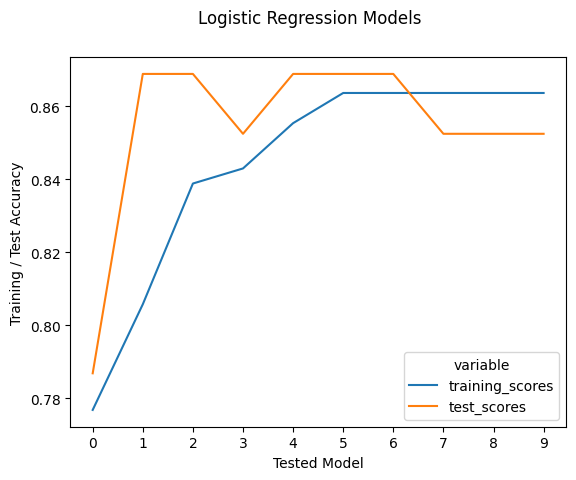

In [429]:
sns.lineplot(data=pd.melt(results_df,id_vars='model'), x="model", y="value", hue="variable",markers=True)
plt.xticks(
    results_df['model'], # Odd rows only
)
plt.ylabel('Training / Test Accuracy')
plt.xlabel('Tested Model')
plt.suptitle('Logistic Regression Models')
plt.show()

In [430]:
# best performing models 0,1 and 6
#print(f'{selected_vars_output[0]}')
print(f'{selected_vars_output[5]}')
print(f'{selected_vars_output[6]}')

['Intercept', 'cp_0[T.True]', 'restecg_0[T.True]', 'ca_0[T.True]', 'thal_2[T.True]', 'exang_1[T.True]:chol', 'cp_2[T.True]:thalach', 'oldpeak']
['Intercept', 'cp_0[T.True]', 'restecg_0[T.True]', 'restecg_2[T.True]', 'ca_0[T.True]', 'thal_2[T.True]', 'exang_1[T.True]:chol', 'cp_2[T.True]:thalach', 'oldpeak']


### 4.3 Add Main Effect Variables to the Models

In [431]:
# add main effect variables to the models
selected_vars_output_upd=selected_vars_output
selected_vars_output_upd[10]=selected_vars_output[5]+['chol','thalach','exang_1[T.True]']
selected_vars_output_upd[11]=selected_vars_output[6]+['chol','thalach','exang_1[T.True]']
selected_vars_output_upd[12]=selected_vars_output[6]+['chol','thalach','exang_1[T.True]','sex_1[T.True]']
model_nums_upd=model_nums+[10,11,12]

In [432]:
# get the indices for all selected variables in models
selected_index_output={}
for j in model_nums_upd:
    selected_index_output[j]=[column_dict[x] for x in selected_vars_output_upd[j]]

In [433]:
models_all_output={}
training_scores_output={}
testing_scores_output={}
logger.info("Estimating models and scores for all models")
for j in model_nums_upd:
    models_all_output[j]=clf_no_intercept.fit(X_train[:,selected_index_output[j]],y_train.reshape(y_train.shape[0]))
    training_scores_output[j]=models_all_output[j].score(X_train[:,selected_index_output[j]],y_train.reshape(y_train.shape[0]))
    testing_scores_output[j]=models_all_output[j].score(X_test[:,selected_index_output[j]],y_test.reshape(y_test.shape[0]))
logger.info("Calculated all accuracy scores")

INFO - Estimating models and scores for all models
INFO - Calculated all accuracy scores


In [434]:
results_df=pd.concat([pd.DataFrame.from_dict(training_scores_output,orient='index'),pd.DataFrame.from_dict(testing_scores_output,orient='index')]
          ,axis='columns',ignore_index=False)
results_df.columns=['training_scores','test_scores']

In [435]:
results_df['model']=results_df.index

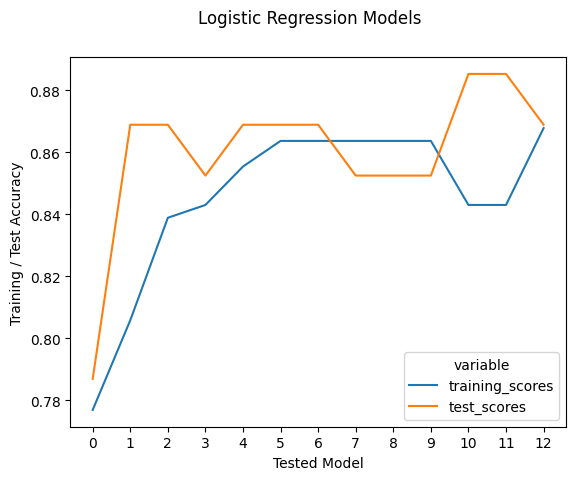

In [436]:
sns.lineplot(data=pd.melt(results_df,id_vars='model'), x="model", y="value", hue="variable",markers=True)
plt.xticks(
    results_df['model'], 
)
plt.ylabel('Training / Test Accuracy')
plt.xlabel('Tested Model')
plt.suptitle('Logistic Regression Models')
plt.show()

In [437]:
results_df

,training_scores,test_scores,model
0,0.776860,0.786885,0
1,0.805785,0.868852,1
2,0.838843,0.868852,2
3,0.842975,0.852459,3
4,0.855372,0.868852,4
5,0.863636,0.868852,5
6,0.863636,0.868852,6
7,0.863636,0.852459,7
8,0.863636,0.852459,8
9,0.863636,0.852459,9


In [477]:
import shap

ImportError: Numba needs NumPy 1.24 or less

### 4.4 Estimate Final Models 

In [403]:
m1=11
m2=12

In [404]:
model12_sm=sm.Logit(np.asarray(y_scale),pd.DataFrame(X_scale[:,selected_index_output[m1]],
                                                     columns=selected_vars_output_upd[m1])).fit()
print(model12_sm.summary())

Optimization terminated successfully.
         Current function value: 0.339280
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  303
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                           11
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                  0.5077
Time:                        15:43:18   Log-Likelihood:                -102.80
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.352e-39
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6552      0.428     -1.532      0.126      -1.493       0.183

In [405]:
model13_sm=sm.Logit(np.asarray(y_scale),pd.DataFrame(X_scale[:,selected_index_output[m2]],
                                                     columns=selected_vars_output_upd[m2])).fit()
print(model13_sm.summary())

Optimization terminated successfully.
         Current function value: 0.326827
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                  0.5258
Time:                        15:44:31   Log-Likelihood:                -99.029
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.900e-40
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5443      0.621      0.876      0.381      -0.674       1.762

In [451]:
margeff_12 = model12_sm.get_margeff(at='overall')
print(margeff_12.summary())

        Logit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                          dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
cp_0[T.True]            -0.1715      0.036     -4.709      0.000      -0.243      -0.100
restecg_0[T.True]       -0.0625      0.038     -1.633      0.102      -0.138       0.013
restecg_2[T.True]       -0.0301      0.209     -0.144      0.885      -0.440       0.380
ca_0[T.True]             0.2113      0.033      6.419      0.000       0.147       0.276
thal_2[T.True]           0.1860      0.033      5.639      0.000       0.121       0.251
exang_1[T.True]:chol    -0.0379      0.044     -0.853      0.394      -0.125       0.049
cp_2[T.True]:thalach     0.0698      0.053      1.324      0.186      -0.034       0.173
oldpeak                 -0.0817      0.023     

In [407]:
margeff_13 = model13_sm.get_margeff()
print(margeff_13.summary())

        Logit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                          dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
cp_0[T.True]            -0.1702      0.035     -4.876      0.000      -0.239      -0.102
restecg_0[T.True]       -0.0505      0.037     -1.349      0.177      -0.124       0.023
restecg_2[T.True]       -0.0755      0.199     -0.380      0.704      -0.465       0.314
ca_0[T.True]             0.1980      0.032      6.159      0.000       0.135       0.261
thal_2[T.True]           0.1343      0.037      3.632      0.000       0.062       0.207
exang_1[T.True]:chol    -0.0410      0.044     -0.929      0.353      -0.128       0.045
cp_2[T.True]:thalach     0.0887      0.052      1.695      0.090      -0.014       0.191
oldpeak                 -0.0722      0.022     

In [419]:
selected_vars_output_upd[m2]

['Intercept',
 'cp_0[T.True]',
 'restecg_0[T.True]',
 'restecg_2[T.True]',
 'ca_0[T.True]',
 'thal_2[T.True]',
 'exang_1[T.True]:chol',
 'cp_2[T.True]:thalach',
 'oldpeak',
 'chol',
 'thalach',
 'exang_1[T.True]',
 'sex_1[T.True]']

In [422]:
models_all_output[12].coef_[0]

array([ 0.19793985, -1.34227666, -0.40977095, -0.09711742,  1.75244635,
        1.1537667 , -0.35283474,  0.61398815, -0.81172243, -0.07676415,
        0.12384487, -0.94251484, -0.93805134])

In [412]:
models_all_output[12].intercept_

array([0.])

In [413]:
models_all_output[12].classes_

array([0., 1.])

In [414]:
models_all_output[12].get_feature_names_out()

AttributeError: 'LogisticRegression' object has no attribute 'get_feature_names_out'

In [218]:
var_nums=[i for i in range(len(scaled_names)) if sfs_forward.get_support()[i]==True]

In [228]:
var_nums+np.array([1,1])

array([17, 80])

In [235]:
model1=clf.fit(X_train[:,var_nums+np.array([1,1])],y_train.reshape(y_train.shape[0]))

In [238]:
model1.score(X_train[:,var_nums+np.array([1,1])],y_train.reshape(y_train.shape[0]))

0.7644628099173554

In [240]:
model1.coef_

array([[2.15133678, 1.28127073]])

In [ ]:
clf.fit(X_train[:,var_nums+np.array([1,1])],y_train.reshape(y_train.shape[0]))

In [ ]:
## 5. Model Results

## Testing

In [454]:
pd.DataFrame(X_test[:,selected_index_output[m2]],
                                                     columns=selected_vars_output_upd[m2])

,Intercept,cp_0[T.True],restecg_0[T.True],restecg_2[T.True],ca_0[T.True],thal_2[T.True],exang_1[T.True]:chol,cp_2[T.True]:thalach,oldpeak,chol,thalach,exang_1[T.True],sex_1[T.True]
0,1.0,1.0,1.0,0.0,0.0,0.0,0.574662,-0.000000,-0.379244,0.574662,-1.646316,1.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,-0.724323,0.806568,0.409017,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,-0.000000,1.021244,-0.724323,-2.324160,1.021244,0.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,3.144951,0.000000,0.742260,3.144951,0.015443,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,-0.859167,-0.896862,0.362082,-0.859167,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,-0.159479,0.828529,0.149501,-0.159479,0.0,1.0
57,1.0,0.0,0.0,0.0,1.0,1.0,-0.000000,0.583939,-0.896862,-0.971377,0.583939,0.0,1.0
58,1.0,1.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,2.036303,-1.029353,-0.378132,0.0,1.0
59,1.0,1.0,1.0,0.0,0.0,0.0,0.690615,-0.000000,1.518686,0.690615,-0.334401,1.0,1.0


In [469]:
X_eval=np.vstack((X_test[:,selected_index_output[m2]][0],X_test[:,selected_index_output[m2]][0]))

In [466]:
X_test[:,selected_index_output[m2]][0,:]

array([ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.57466203, -0.        , -0.37924438,  0.57466203,
       -1.6463164 ,  1.        ,  1.        ])

In [472]:
X_eval[1,1]=0

In [473]:
X_eval

array([[ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.57466203, -0.        , -0.37924438,  0.57466203,
        -1.6463164 ,  1.        ,  1.        ],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.57466203, -0.        , -0.37924438,  0.57466203,
        -1.6463164 ,  1.        ,  1.        ]])

In [474]:
model13_sm.predict(X_eval)

array([0.01484894, 0.07539447])

In [261]:
selected_index=[ column_dict[x] for x in selected_vars]

In [361]:
X_scale.design_info.column_names

['Intercept',
 'sex_1[T.True]',
 'cp_0[T.True]',
 'cp_1[T.True]',
 'cp_2[T.True]',
 'fbs_1[T.True]',
 'restecg_0[T.True]',
 'restecg_2[T.True]',
 'exang_1[T.True]',
 'slope_0[T.True]',
 'slope_1[T.True]',
 'ca_0[T.True]',
 'ca_1[T.True]',
 'ca_2[T.True]',
 'ca_4[T.True]',
 'thal_0[T.True]',
 'thal_1[T.True]',
 'thal_2[T.True]',
 'age',
 'cp_0[T.True]:age',
 'sex_1[T.True]:age',
 'cp_1[T.True]:age',
 'cp_2[T.True]:age',
 'fbs_1[T.True]:age',
 'restecg_0[T.True]:age',
 'restecg_2[T.True]:age',
 'exang_1[T.True]:age',
 'slope_0[T.True]:age',
 'slope_1[T.True]:age',
 'ca_0[T.True]:age',
 'ca_1[T.True]:age',
 'ca_2[T.True]:age',
 'ca_4[T.True]:age',
 'thal_0[T.True]:age',
 'thal_1[T.True]:age',
 'thal_2[T.True]:age',
 'trestbps',
 'cp_0[T.True]:trestbps',
 'sex_1[T.True]:trestbps',
 'cp_1[T.True]:trestbps',
 'cp_2[T.True]:trestbps',
 'fbs_1[T.True]:trestbps',
 'restecg_0[T.True]:trestbps',
 'restecg_2[T.True]:trestbps',
 'exang_1[T.True]:trestbps',
 'slope_0[T.True]:trestbps',
 'slope_1[T.T

In [267]:
X_scale

DesignMatrix with shape (303, 108)
  Columns:
    ['Intercept',
     'sex_1[T.True]',
     'cp_0[T.True]',
     'cp_1[T.True]',
     'cp_2[T.True]',
     'fbs_1[T.True]',
     'restecg_0[T.True]',
     'restecg_2[T.True]',
     'exang_1[T.True]',
     'slope_0[T.True]',
     'slope_1[T.True]',
     'ca_0[T.True]',
     'ca_1[T.True]',
     'ca_2[T.True]',
     'ca_4[T.True]',
     'thal_0[T.True]',
     'thal_1[T.True]',
     'thal_2[T.True]',
     'age',
     'cp_0[T.True]:age',
     'sex_1[T.True]:age',
     'cp_1[T.True]:age',
     'cp_2[T.True]:age',
     'fbs_1[T.True]:age',
     'restecg_0[T.True]:age',
     'restecg_2[T.True]:age',
     'exang_1[T.True]:age',
     'slope_0[T.True]:age',
     'slope_1[T.True]:age',
     'ca_0[T.True]:age',
     'ca_1[T.True]:age',
     'ca_2[T.True]:age',
     'ca_4[T.True]:age',
     'thal_0[T.True]:age',
     'thal_1[T.True]:age',
     'thal_2[T.True]:age',
     'trestbps',
     'cp_0[T.True]:trestbps',
     'sex_1[T.True]:trestbps',
     'cp_1

In [274]:
np.asarray(y_train).reshape(242)

array([1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0.

In [273]:
np.asarray(X_train[:,selected_index])

array([[ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        , -1.69004691],
       [ 1.        ,  1.        , -0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        ,  0.45274783],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.40901733],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.19036481],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        , -0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        , -0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        , -0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        , -1.952

In [130]:
np.asarray(X[0:3])

array([[  1. ,  63. ,  63. , 145. , 145. , 233. , 233. , 150. , 150. ,
          2.3,   2.3],
       [  1. ,  37. ,  37. , 130. , 130. , 250. , 250. , 187. , 187. ,
          3.5,   3.5],
       [  1. ,  41. ,   0. , 130. ,   0. , 204. ,   0. , 172. ,   0. ,
          1.4,   0. ]])

In [142]:
Xd[:,1:].shape

(303, 22)

In [143]:
poly = PolynomialFeatures(interaction_only=True,include_bias = True)
poly.fit_transform(Xd[:,1:])

array([[1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 3.4950e+04, 5.3590e+02,
        3.4500e+02],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.6750e+04, 8.7500e+02,
        6.5450e+02],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.5088e+04, 2.8560e+02,
        2.4080e+02],
       ...,
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.7213e+04, 6.5620e+02,
        4.7940e+02],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.5065e+04, 1.5720e+02,
        1.3800e+02],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 4.1064e+04, 0.0000e+00,
        0.0000e+00]])

In [144]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18',
       'x19', 'x20', 'x21', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5',
       'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12',
       'x0 x13', 'x0 x14', 'x0 x15', 'x0 x16', 'x0 x17', 'x0 x18',
       'x0 x19', 'x0 x20', 'x0 x21', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5',
       'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12',
       'x1 x13', 'x1 x14', 'x1 x15', 'x1 x16', 'x1 x17', 'x1 x18',
       'x1 x19', 'x1 x20', 'x1 x21', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6',
       'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13',
       'x2 x14', 'x2 x15', 'x2 x16', 'x2 x17', 'x2 x18', 'x2 x19',
       'x2 x20', 'x2 x21', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8',
       'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x3 x14',
       'x3 x15', 'x3 x16', 'x3 x17', 'x3 x18', 'x3 x19', 'x3 x20',
       'x3 x2

In [109]:
set(df.columns)-['target','sex']

TypeError: unsupported operand type(s) for -: 'set' and 'list'

In [112]:
[var for var in df.columns if var not in ['target','sex']]

['age',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

/Users/tmuhammad/venv/heckman/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


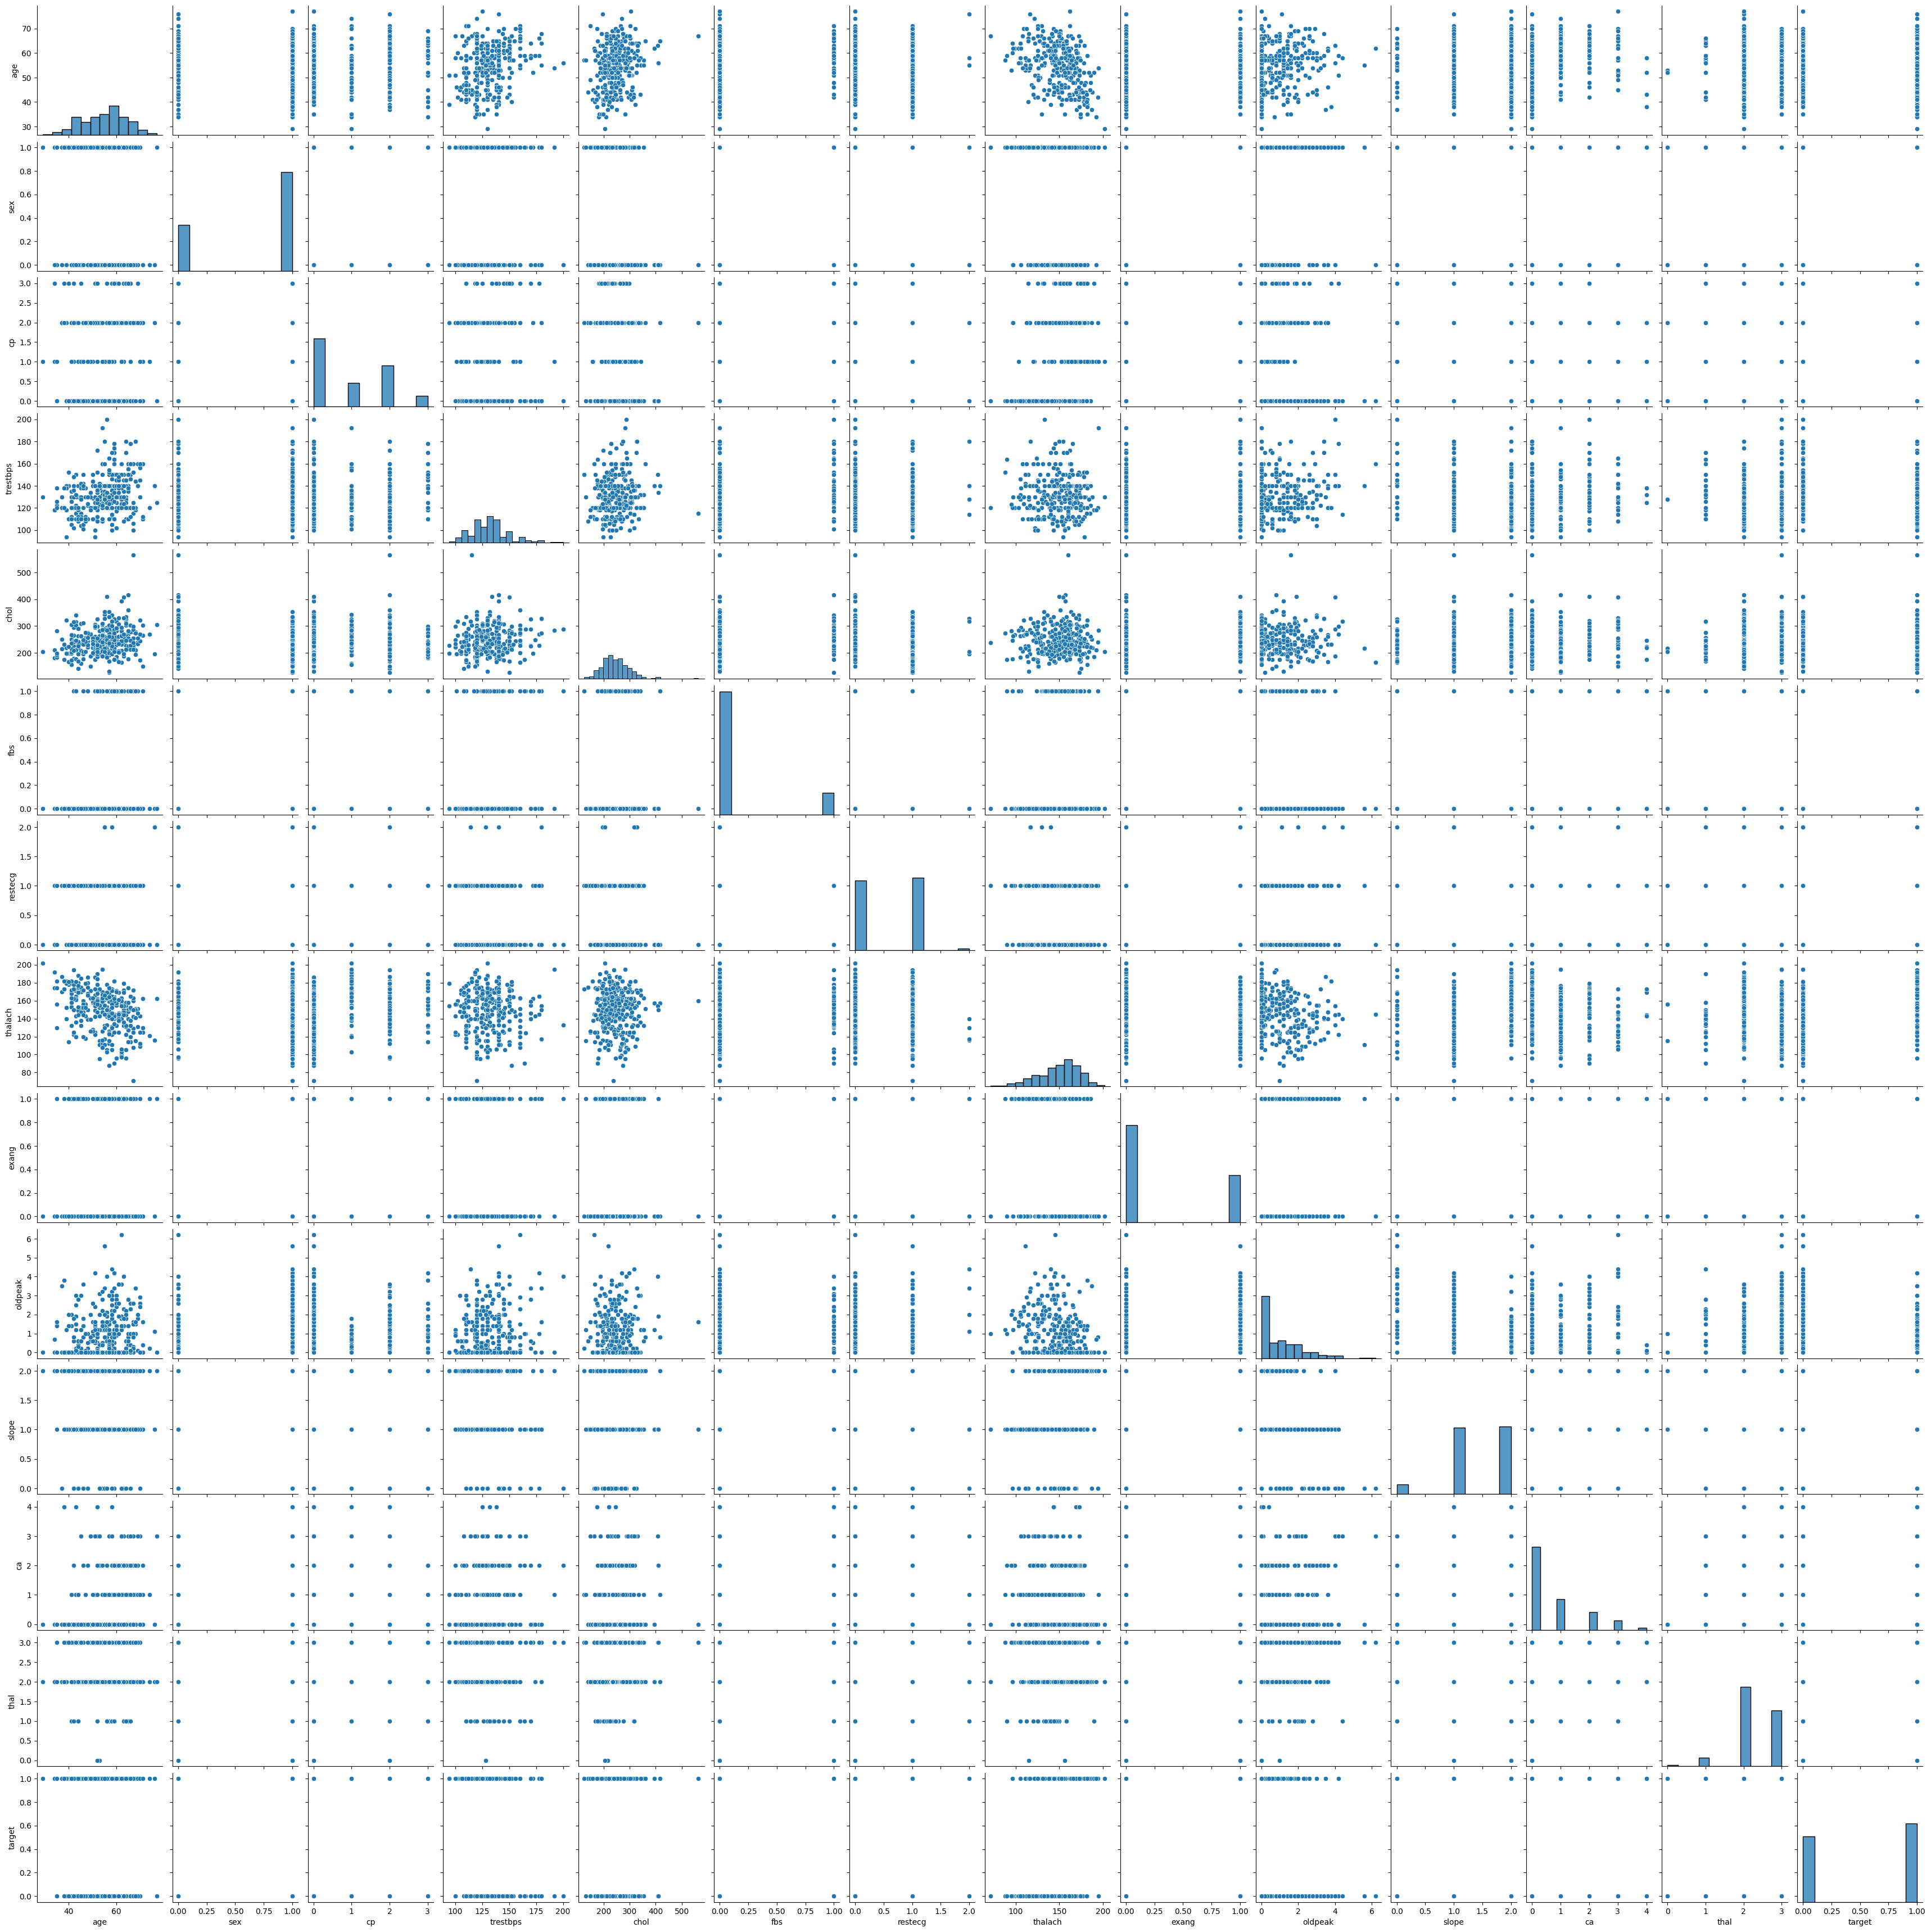

In [120]:
sns.pairplot(df)

/Users/tmuhammad/venv/heckman/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


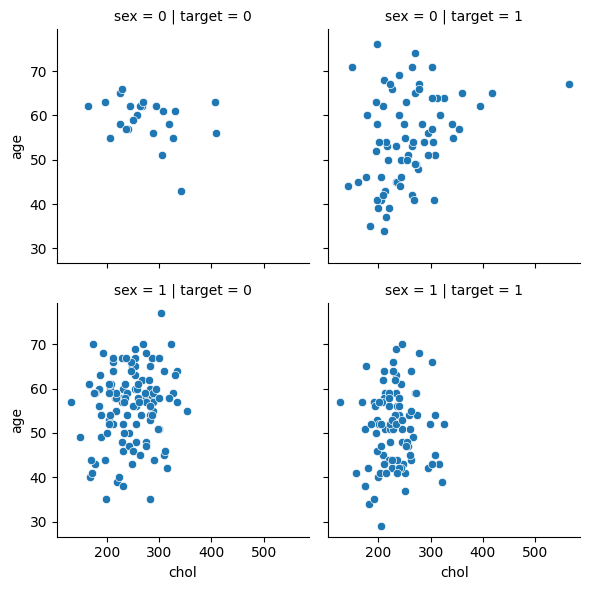

In [96]:
g=sns.FacetGrid(df, col='target', row="sex")
g.map(sns.scatterplot, "chol","age")

In [177]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.0.
